# Gender x Gender Analysis

From the main analysis file, we have found some specifics of Gender x Gender in the use of hedges, but let's just try to examine some specific words just for fun! I will be basing this off of the [study](https://nlp.stanford.edu/robvoigt/rtgender/rtgender.pdf) that this data is from, where they did something similar.

For this quick analysis, I'm going to examine some "stereotypical" words that I think people may use when interacting with different genders.

In [1]:
# import things
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# look at df from when we know both genders
# made up of fitocracy and some reddit
gender_visible_df = pd.read_pickle("gender_visible_df.pkl")
gender_visible_df.sample(5)

,op_id,op_gender,responder_id,responder_gender,post_text,response_text,source,post_tokens,response_tokens,post_length,response_length,post_avg_slen,response_avg_slen,post_hedges,response_hedges,post_questions,response_questions
204155,838928,M,7715,W,just joined the WTF - Welcome to Fitocracy group!,Welcome! Fitocracy is a great place to track y...,fitocracy,"[just, joined, the, WTF, -, Welcome, to, Fitoc...","[Welcome, !, Fitocracy, is, a, great, place, t...",10,86,10.000000,28.666667,0,0,0,0
215193,936194,W,618315,M,2.5kg off the #1 spot in National women's Benc...,Woohoo!,fitocracy,"[2.5kg, off, the, #, 1, spot, in, National, wo...","[Woohoo, !]",33,2,16.500000,2.000000,0,0,0,0
227102,1011527,M,931484,W,Hey friends.....wanna introduce fmrdvr.....@ho...,Thanks Barbie! Hi fmrdvr!,fitocracy,"[Hey, friends, ..., .., wan, na, introduce, fm...","[Thanks, Barbie, !, Hi, fmrdvr, !]",39,6,39.000000,3.000000,0,0,0,0
344285,traizie,M,ManInTheMirage,M,"Youre right, however its not about the single ...",Ive scrolled through quite a few of your respo...,reddit,"[Youre, right, ,, however, its, not, about, th...","[Ive, scrolled, through, quite, a, few, of, yo...",138,40,19.714286,40.000000,1,0,0,0
372648,pouscat,W,WillieMaysHayes810,M,What are your interests?,So i thought about it a bit and maybe my inter...,reddit,"[What, are, your, interests, ?]","[So, i, thought, about, it, a, bit, and, maybe...",5,44,5.000000,44.000000,0,0,0,0


In [22]:
# stereotypical language
m_to_m = ['bro','dude','man']
f_to_f = ['girl','girly','girlie','chica'] # somewhat problematic... not as many that I can think of

### Male to male

In [11]:
def find_mtom(text):
    if any(word in text for word in m_to_m):
        return 1
    else:
        return 0
    
gender_visible_df['m_to_m'] = gender_visible_df.response_text.map(find_mtom)

In [12]:
gender_visible_df.groupby(['op_gender', 'responder_gender']).m_to_m.describe()

count      mean       std  min  25%  50%  75%  \
op_gender responder_gender                                                     
M         M                 129264.0  0.120861  0.325967  0.0  0.0  0.0  0.0   
          W                 108075.0  0.037039  0.188858  0.0  0.0  0.0  0.0   
W         M                  88375.0  0.039898  0.195721  0.0  0.0  0.0  0.0   
          W                  71052.0  0.018550  0.134929  0.0  0.0  0.0  0.0   

                            max  
op_gender responder_gender       
M         M                 1.0  
          W                 1.0  
W         M                 1.0  
          W                 1.0

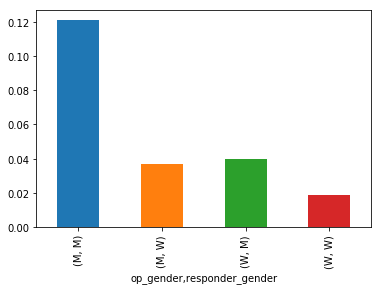

In [27]:
gender_visible_df.groupby(['op_gender', 'responder_gender']).m_to_m.mean().plot(kind='bar')
plt.show()

As we can see, 'bro', 'dude', and 'man' are much more widely used in a male-to-male context.

### Female to female

In [23]:
def find_ftof(text):
    if any(word in text for word in f_to_f):
        return 1
    else:
        return 0

gender_visible_df['f_to_f'] = gender_visible_df.response_text.map(find_ftof)

In [24]:
gender_visible_df.groupby(['op_gender', 'responder_gender']).f_to_f.describe()

count      mean       std  min  25%  50%  75%  \
op_gender responder_gender                                                     
M         M                 129264.0  0.020942  0.143190  0.0  0.0  0.0  0.0   
          W                 108075.0  0.010261  0.100778  0.0  0.0  0.0  0.0   
W         M                  88375.0  0.016758  0.128365  0.0  0.0  0.0  0.0   
          W                  71052.0  0.011147  0.104989  0.0  0.0  0.0  0.0   

                            max  
op_gender responder_gender       
M         M                 1.0  
          W                 1.0  
W         M                 1.0  
          W                 1.0

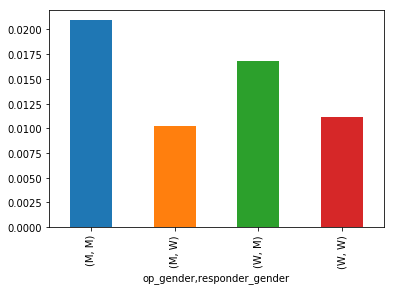

In [28]:
gender_visible_df.groupby(['op_gender', 'responder_gender']).f_to_f.mean().plot(kind='bar')
plt.show()

Hm... these aren't really the results I'd like to see. Why are male responders using this seemingly female-to-female language so much more? Maybe they're using the word "girl" to talk about girls instead of address people as girls.

In [36]:
sample = gender_visible_df[(gender_visible_df.f_to_f == 1) &
                           (gender_visible_df.responder_gender == 'M')].sample(3)

for entry in sample.response_text:
    print(entry)
    print()

Your female friends dont know how to wingwoman. If theyre waiting for a girl to hit on you, theyre doing it horribly wrong. The best thing about a wingwoman is that its 1000 times easier for them to approach a girl in a social setting than it is for a man, even if the man is approaching in a wingman capacity, even if the man is gay. A woman can slide into a group of women and subtly inform one of them that youre interested without the instant, whole group judgement that any approaching man automatically receives.

I didnt know, thanks. English is not my first language, I tought it was just another slang word for sex.   She invited me but its not a date so I wont ignore the other girls there.

Man, I hate when this is said. Yeah, you get over them, but its just trading one attachment for another. It takes longer, but I really think getting over her without distractions from other girls is the best way to go. 



Yes, they don't really seem to be addressing people as girl. Let's get rid of this:

In [37]:
f_to_f = ['girly','girlie','chica']
gender_visible_df['f_to_f'] = gender_visible_df.response_text.map(find_ftof)
gender_visible_df.groupby(['op_gender', 'responder_gender']).f_to_f.describe()

count      mean       std  min  25%  50%  75%  \
op_gender responder_gender                                                     
M         M                 129264.0  0.000232  0.015233  0.0  0.0  0.0  0.0   
          W                 108075.0  0.000315  0.017734  0.0  0.0  0.0  0.0   
W         M                  88375.0  0.000554  0.023540  0.0  0.0  0.0  0.0   
          W                  71052.0  0.001224  0.034971  0.0  0.0  0.0  0.0   

                            max  
op_gender responder_gender       
M         M                 1.0  
          W                 1.0  
W         M                 1.0  
          W                 1.0

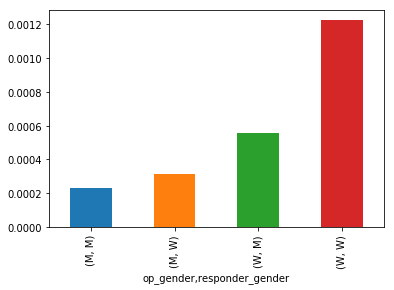

In [38]:
gender_visible_df.groupby(['op_gender', 'responder_gender']).f_to_f.mean().plot(kind='bar')
plt.show()

So now there's way less occurrences of this female-to-female language, but it at least makes sense now.